In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Câu 7

In [3]:

#  Load digits
digits = load_digits()
X = digits.data
y = digits.target

# chia tập test và tập train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# một số kernel khác
kernels = ['linear', 'rbf', 'poly']
results = []

In [4]:

# test thử kernel khác
for kernel in kernels:
    # mô hình
    svm = SVC(kernel=kernel, random_state=42)
    
    # xem tgian chạy
    start_time = time.time()
    svm.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # xem thử tgian dự đoán
    start_time = time.time()
    y_pred = svm.predict(X_test)
    prediction_time = time.time() - start_time
    
    # Tính accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    results.append({
        'Kernel': kernel,
        'Accuracy': accuracy,
        'Training Time (s)': training_time,
        'Prediction Time (s)': prediction_time
    })

In [5]:
# lập df từ kq
df_results = pd.DataFrame(results)
print("\nFinal result:")
print(df_results.to_string(index=False))


Final result:
Kernel  Accuracy  Training Time (s)  Prediction Time (s)
linear  0.977778           0.019302             0.003495
   rbf  0.986111           0.017162             0.023055
  poly  0.991667           0.012621             0.002507


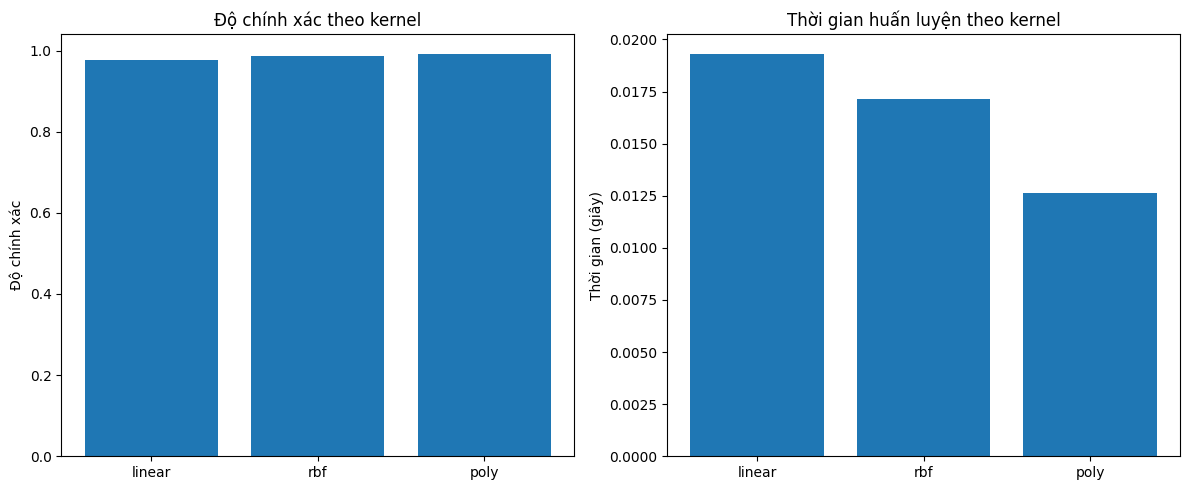

In [6]:
# Vẽ biểu đồ so sánh
plt.figure(figsize=(12, 5))

# Biểu đồ độ chính xác
plt.subplot(1, 2, 1)
plt.bar(df_results['Kernel'], df_results['Accuracy'])
plt.title('Độ chính xác theo kernel')
plt.ylabel('Độ chính xác')

# Biểu đồ thời gian huấn luyện
plt.subplot(1, 2, 2)
plt.bar(df_results['Kernel'], df_results['Training Time (s)'])
plt.title('Thời gian huấn luyện theo kernel')
plt.ylabel('Thời gian (giây)')

plt.tight_layout()
plt.show()